In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
from scipy.stats import pearsonr
import sklearn
import sklearn.linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()
df = pd.read_csv('df2_2.csv', index_col=0)
df.head()

Saving df2_2.csv to df2_2 (2).csv


,Y,X1,X2,X3
0,22.64,21,26.2,B
1,31.58,20,29.0,E
2,42.00,27,30.4,A
3,28.97,10,29.3,C
4,30.46,8,32.9,D


In [ ]:
df.describe()

,Y,X1,X2
count,100.000000,100.000000,100.000000
mean,30.259500,16.950000,30.800000
std,7.046523,7.115746,4.890766
min,8.190000,5.000000,18.000000
25%,24.960000,11.000000,27.975000
50%,30.055000,17.000000,30.750000
75%,34.672500,22.000000,33.575000
max,45.560000,29.000000,42.300000


<Axes: >

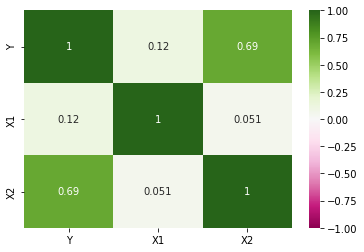

In [ ]:
sns.heatmap(df.corr(),cmap='PiYG', annot=True,vmin=-1, vmax=1)


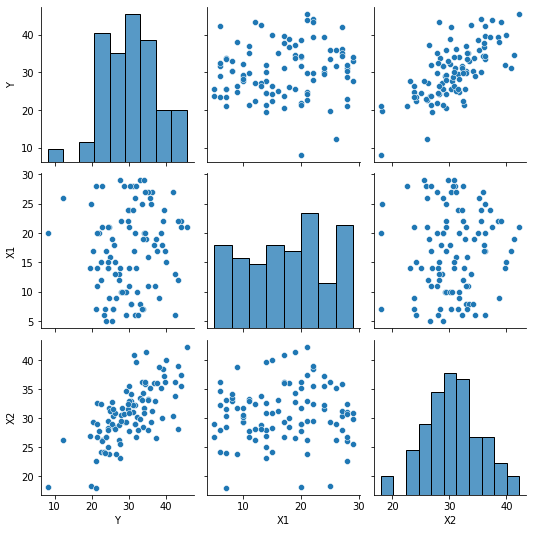

In [ ]:
sns.pairplot(data=df)

Из диаграммы видно, что x2 и y могут коррелировать

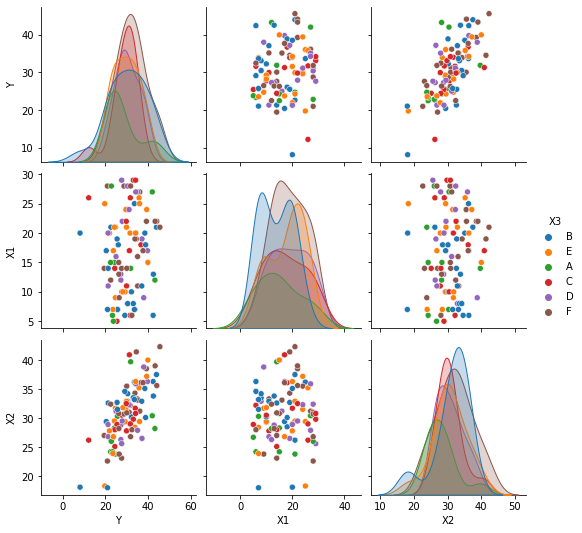

In [ ]:
sns.pairplot(data=df,hue='X3')

Проверим отдельно связь Y и X2

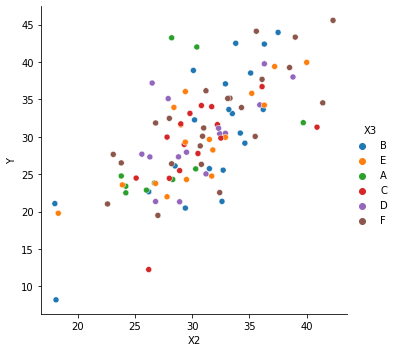

In [ ]:
sns.relplot(data=df, x='X2', y='Y', hue='X3')

<Axes: xlabel='X2', ylabel='Y'>

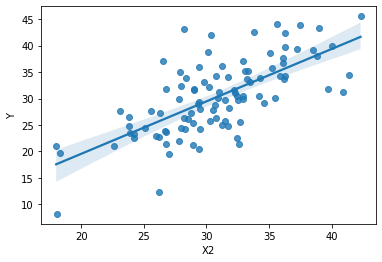

In [ ]:
sns.regplot(x = df.X2, y = df.Y)

Делаем вывод, что возможна линейная взаимосвязь

In [ ]:
# парная регрессия y(x)==df.y(df.x2)
y=df.Y # зависимая переменная
x=df.X2 # предиктор
# линейная регрессия OLS (Ordinary Least Squares)
x = sm.add_constant(x) # добавление b0
smm=sm.OLS(y,x).fit() #подгонка модели
print(smm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     88.11
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           2.59e-15
Time:                        11:19:58   Log-Likelihood:                -304.58
No. Observations:                 100   AIC:                             613.2
Df Residuals:                      98   BIC:                             618.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2743      3.293     -0.083      0.9

По критерию R2 получаем, что данная регрессионая модель охватывает лишь 50% всех значений, модель нельзя назвать качественной

In [ ]:
y_pred = smm.predict()
y_pred

array([25.69925397, 28.4750559 , 29.86295687, 28.77246325, 32.34135145,
       35.51369651, 22.6260447 , 30.65604313, 25.99666132, 30.45777157,
       32.73789458, 27.2854265 , 37.8929553 , 22.13036578, 35.71196807,
       36.90159747, 32.53962301, 26.49234024, 31.15172205, 29.76382108,
       30.65604313, 24.60876036, 40.76789302, 32.0439441 , 27.97937699,
       33.72925241, 35.61283229, 27.78110542, 34.91888181, 27.68196964,
       28.87159904, 23.31999518, 31.15172205, 31.64740096, 28.87159904,
       39.0825847 , 29.6646853 , 28.27678434, 29.96209265, 17.66925554,
       28.87159904, 35.01801759, 26.29406867, 34.62147446, 41.66011507,
       17.8675271 , 28.97073482, 27.8802412 , 32.93616615, 28.37592012,
       38.19036265, 27.48369807, 23.71653831, 23.71653831, 32.34135145,
       29.26814217, 35.71196807, 30.16036422, 32.6387588 , 29.56554952,
       25.79838976, 33.63011663, 32.14307988, 28.4750559 , 30.2595    ,
       36.60419012, 25.10443927, 27.2854265 , 28.37592012, 40.27

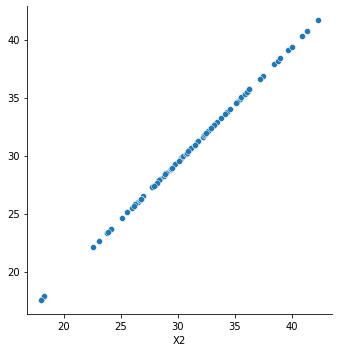

In [ ]:
sns.relplot(x=df.X2, y=y_pred)


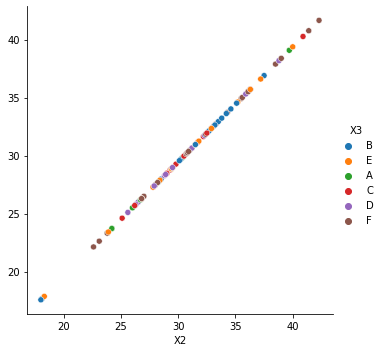

In [ ]:
sns.relplot(x=df.X2, y=y_pred,hue=df.X3)


Теперь построим модель множественной регрессии

In [ ]:
smm1 = sm.OLS.from_formula("Y ~ X2", data=df).fit()
smm2 = sm.OLS.from_formula("Y ~ X2+X3", data=df).fit()
smm3 = sm.OLS.from_formula("Y ~ X2+X3+X2*X3", data=df).fit()

In [ ]:
print(smm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     88.11
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           2.59e-15
Time:                        11:25:41   Log-Likelihood:                -304.58
No. Observations:                 100   AIC:                             613.2
Df Residuals:                      98   BIC:                             618.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2743      3.293     -0.083      0.9

In [ ]:
print(smm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     14.35
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           1.62e-11
Time:                        11:25:54   Log-Likelihood:                -303.88
No. Observations:                 100   AIC:                             621.8
Df Residuals:                      93   BIC:                             640.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4970      3.519      0.141      0.8

In [ ]:
print(smm3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     7.925
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           2.09e-09
Time:                        11:26:04   Log-Likelihood:                -302.22
No. Observations:                 100   AIC:                             628.4
Df Residuals:                      88   BIC:                             659.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3320     10.689      0.780      0.4

Критерий R2 во всех моделях приблизительно равен 0,5, что говорит о плохом качестве моделей

In [ ]:
y_smm1_pred = smm1.predict() # предсказание модели smm1
y_smm2_pred = smm2.predict() # предсказание модели smm2
y_smm3_pred = smm3.predict() # предсказание модели smm3

In [ ]:
dfc=df
dfc.insert(4, 'Y(X2)', y_smm1_pred)
dfc.insert(5, 'Y(X2+X3)', y_smm2_pred)

In [ ]:
dfc.insert(6, 'Y(X2+X3+X2*X3)', y_smm3_pred)

In [ ]:
dfc.head()

,Y,X1,X2,X3,Y(X2),Y(X2+X3),Y(X2+X3+X2*X3)
0,22.64,21,26.2,B,25.699254,25.343298,23.766469
1,31.58,20,29.0,E,28.475056,28.245852,28.315167
2,42.00,27,30.4,A,29.862957,30.641332,30.024097
3,28.97,10,29.3,C,28.772463,27.774153,27.949611
4,30.46,8,32.9,D,32.341351,32.485276,32.018368


<Axes: xlabel='X2'>

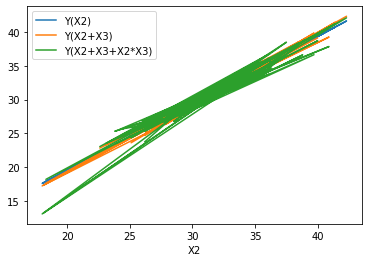

In [ ]:
dfc.plot('X2', y=['Y(X2)','Y(X2+X3)','Y(X2+X3+X2*X3)'] )

Модель smm3 откровенно говоря пугает, поэтому построим график без нее

<Axes: xlabel='X2'>

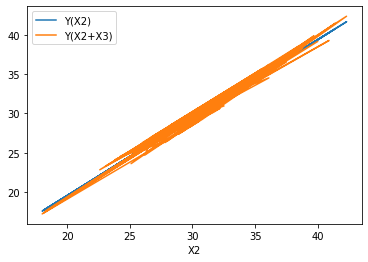

In [ ]:
dfc.plot('X2', y=['Y(X2)','Y(X2+X3)'])

Теперь построим отдельно smm1

<Axes: xlabel='X2'>

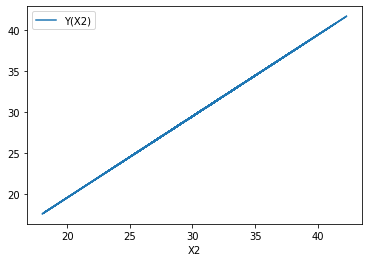

In [ ]:
dfc.plot('X2', y='Y(X2)')

Теперь видно, что модель smm1 наилучшая среди 3 существующих

Теперь построим модель с помощью библоитеки Scikit-learn

In [ ]:
X = df.iloc[:,1:3]
Y=df.Y


In [ ]:
X.head(4)

,X1,X2
0,21,26.2
1,20,29.0
2,27,30.4
3,10,29.3


In [ ]:
skm = lm.LinearRegression()
skm.fit(X, Y)
print(skm.intercept_, skm.coef_)


-1.4579861558177782 [0.08083685 0.985302  ]


In [ ]:
yp=skm.predict(X)


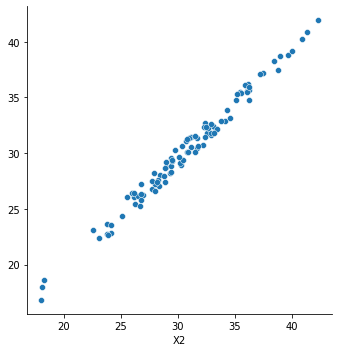

In [ ]:
sns.relplot(x=df.X2, y=yp)

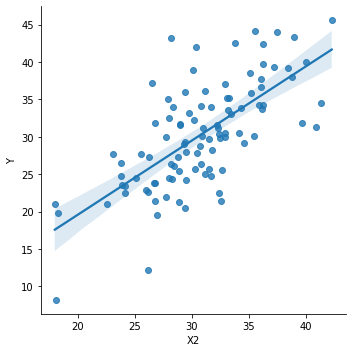

In [ ]:
sns.lmplot(data=df, x='X2', y='Y')

Построим регрессию с обучением

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [ ]:
print(X_test[:5],Y_test[:5])


    X1    X2
84  15  40.0
3   10  29.3
57  28  30.7
62  19  32.7
96  26  26.2 84    39.94
3     28.97
57    28.77
62    25.53
96    12.24
Name: Y, dtype: float64


In [ ]:
model = lm.LinearRegression()
model.fit(X_train, Y_train)
print(model.intercept_, model.coef_)


-2.005426891137585 [0.13797803 0.96983032]


In [ ]:
Y_pred = model.predict(X_test)

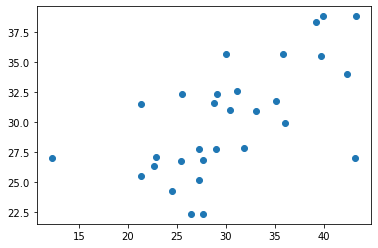

In [ ]:
plt.scatter(Y_test, Y_pred)

Модель совершенно не совершенна

In [ ]:
from sklearn import metrics
SSA=metrics.mean_absolute_error(Y_test, Y_pred)
SSR=metrics.mean_squared_error(Y_test, Y_pred)
SSRx=np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print (SSA, SSR, SSRx)


4.135923246645178 32.200026631135046 5.674506730204401


Text(0.5, 1.0, 'Гистограмма остатков')

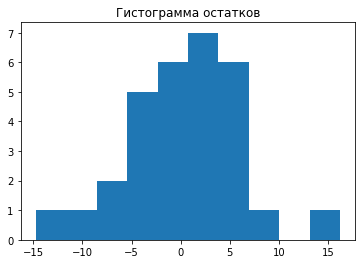

In [ ]:
plt.hist(Y_test - Y_pred)
plt.title("Гистограмма остатков")

Гистограмма остатков показывает, что их распределение нормальное с
нулевым средним

Y и X2 коррелируют, что показывает модель регрессии. В остальном все предельно - практически все данные созданы случайно, так что они не кореллируют, поэтому их добавление в модель множественной регресиии никак на нее не влияло, а в некоторых моментах ухудшало.